<a href="https://colab.research.google.com/github/mmburu8/moringa-wk4-independent-project/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2019_07_Martin_Mburu_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [1]:
#importing pandas libraries
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#**LOADING DATASET**

In [3]:
#Laoding Autolib_dataset
paris = pd.read_csv("Autolib_dataset.csv", encoding= "latin1")
paris.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃÂ¨s 37 rue L...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃÂ«n CÃÂ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃÂ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


# **DATA PREPARATION**

In [4]:
#Find missing values in each column
paris.isnull().any()

Address                False
Cars                   False
Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
Charge Slots           False
Charging Status        False
City                   False
Displayed comment       True
ID                     False
Kind                   False
Geo point              False
Postal code            False
Public name            False
Rental status          False
Scheduled at            True
Slots                  False
Station type           False
Status                 False
Subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
dtype: bool

In [5]:
#Looking for duplicates
paris.duplicated()
paris.drop_duplicates()
paris.shape

(5000, 25)

In [6]:
#dropping irrelevant columns
paris.drop(["Scheduled at", "Displayed comment"],axis=1, inplace=True)
paris.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [7]:
#checking accuracy of dataset
# numbers of rows that satisfy number of cars is equal to number of bluecar counter.
psg = paris[paris.Cars == paris["Bluecar counter"]]
psg.shape

(5000, 23)

In [8]:
#renaming the bluecar, utilib, utilib 1.4 columns
paris.rename(columns= {"Bluecar counter": "Bluecar"}, inplace= True)
paris.rename(columns= {"Utilib counter": "Utilib"}, inplace= True)
paris.rename(columns= {"Utilib 1.4 counter": "Utilib_1.4"}, inplace = True)
paris.rename(columns= {"Geo point": "Geo"}, inplace= True)
paris.head()

,Address,Cars,Bluecar,Utilib,Utilib_1.4,Charge Slots,Charging Status,City,ID,Kind,Geo,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [9]:
# split geo column to form longitude and latitude columns
paris[["longitude", "latitude"]] = paris.Geo.str.split(",", expand=True)
paris.head()

,Address,Cars,Bluecar,Utilib,Utilib_1.4,Charge Slots,Charging Status,City,ID,Kind,Geo,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,longitude,latitude
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,48.857,2.2917
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,48.83126,2.313088
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,48.938103,2.4286035
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,48.8250327,2.3725162
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,48.8862632,2.2874511


In [10]:
# covert datatype of longitude and latitude columns to floats
paris["longitude"] = pd.to_numeric(paris["longitude"], errors="coerce")
paris["latitude"] = pd.to_numeric(paris["latitude"], errors= "coerce")
paris.dtypes

Address                 object
Cars                     int64
Bluecar                  int64
Utilib                   int64
Utilib_1.4               int64
Charge Slots             int64
Charging Status         object
City                    object
ID                      object
Kind                    object
Geo                     object
Postal code              int64
Public name             object
Rental status           object
Slots                    int64
Station type            object
Status                  object
Subscription status     object
year                     int64
month                    int64
day                      int64
hour                     int64
minute                   int64
longitude              float64
latitude               float64
dtype: object

In [11]:
#merge utilib and utilib_1.4 column
paris["Utilibs"] = paris["Utilib"] + paris["Utilib_1.4"]
paris["Utilibs"].head(20)

0     0
1     0
2     2
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    2
Name: Utilibs, dtype: int64

#**DATA ANALYSIS**

In [12]:
# create a new column different
paris["different"] = paris["Bluecar"].diff()
paris["different"].head(10)

0    NaN
1    6.0
2   -3.0
3    0.0
4    0.0
5   -3.0
6    0.0
7    3.0
8   -2.0
9    5.0
Name: different, dtype: float64

In [13]:
#finding the most popular picking hour
x = paris[paris["different"] < 0].groupby("hour")["hour"].count()
y = x.sort_values(ascending= False)
y.head(1)

hour
21    113
Name: hour, dtype: int64

In [ ]:
#finding the most popular returning hour
d = paris[paris["different"] > 0].groupby("hour")["hour"].count()
s = d.sort_values(ascending= False)
s.head(1)

hour
6    101
Name: hour, dtype: int64

In [ ]:
#finding the most popular station overall
marseille = paris[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
rennes = marseille[paris["Kind"] == "STATION"]
nantes = rennes.groupby(rennes["ID"])["ID"].count()
nantes.sort_values(ascending= False).head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


ID
paris-portedemontrouge-8    13
Name: ID, dtype: int64

In [ ]:
# Find most popular station during pick up hour
x = paris[(paris["different"] < 0) & (paris["hour"] == 21)]
lyon = x[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
monaco = lyon[paris["Kind"] == "STATION"]
stade = monaco.groupby(rennes["ID"])["ID"].count()
lorient = stade.sort_values(ascending= False).head(1)
lorient

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ID
paris-tronchet-19    4
Name: ID, dtype: int64

In [ ]:
#finding most popular postal code
milan = paris[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
napoli = milan[paris["Kind"] == "STATION"]
rome = napoli.groupby(napoli["Postal code"])["Postal code"].count()
atl = rome.sort_values(ascending=False).head(1)
atl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Postal code
75015    220
Name: Postal code, dtype: int64

In [ ]:
#find most popular station's postal code
popular = paris[paris["ID"] == "paris-portedemontrouge-8"]
poisson = popular["Postal code"].head(1)
poisson

122    75014
Name: Postal code, dtype: int64

In [ ]:
#finding most popular code during pick up hour
x = paris[(paris["different"] < 0) & (paris["hour"] == 21)]
udinese = x[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
spal = udinese[paris["Kind"] == "STATION"]
genoa = spal.groupby(napoli["Postal code"])["Postal code"].count()
genoa.sort_values(ascending=False).head(1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Postal code
75008    9
Name: Postal code, dtype: int64

In [ ]:
#find most popular station's postal code during pick up hour
populaire = paris[paris["ID"] == "paris-tronchet-19"]
post = populaire["Postal code"].head(1)
post


600    75008
Name: Postal code, dtype: int64

In [ ]:
#create new column U_diff
paris["U_dif"] = paris["Utilibs"].diff()
paris["U_dif"]

0       NaN
1       0.0
2       2.0
3      -1.0
4      -1.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: U_dif, Length: 5000, dtype: float64

In [ ]:
# finding most popular pick up hour in utilibs
w = paris[paris["U_dif"] < 0].groupby("hour")["hour"].count()
s = w.sort_values(ascending= False)
s.head(1)

hour
11    37
Name: hour, dtype: int64

In [ ]:
#finding most popular returning hour in utilibs
t = paris[paris["U_dif"] > 0].groupby("hour")["hour"].count()
r = t.sort_values(ascending= False)
r.head(1)


hour
7    38
Name: hour, dtype: int64

In [ ]:
# find most popular utilib station during pick up hour
x = paris[(paris["U_dif"] < 0) & (paris["hour"] == 11)]
ars = x[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
che = ars[paris["Kind"] == "STATION"]
manu = che.groupby(rennes["ID"])["ID"].count()
manc = manu.sort_values(ascending= False).head(1)
manc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ID
suresnes-carnot-52    1
Name: ID, dtype: int64

In [ ]:
# find most popular utilib station's postal code during  pick up hour
x = paris[(paris["U_dif"] < 0) & (paris["hour"] == 11)]
udinese = x[(paris["Status"] == "ok") & (paris["Rental status"] == "operational")]
spal = udinese[paris["Kind"] == "STATION"]
genoa = spal.groupby(napoli["Postal code"])["Postal code"].count()
genoa.sort_values(ascending=False).head(1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Postal code
92130    4
Name: Postal code, dtype: int64

In [ ]:
# find postal code of most popular utilib station
populaire = paris[paris["ID"] == "suresnes-carnot-52"]
post = populaire["Postal code"].head(1)
post


699    92150
Name: Postal code, dtype: int64

Text(0.5, 1.0, 'DISTRIBUTION OF STATIONS IN PARIS')

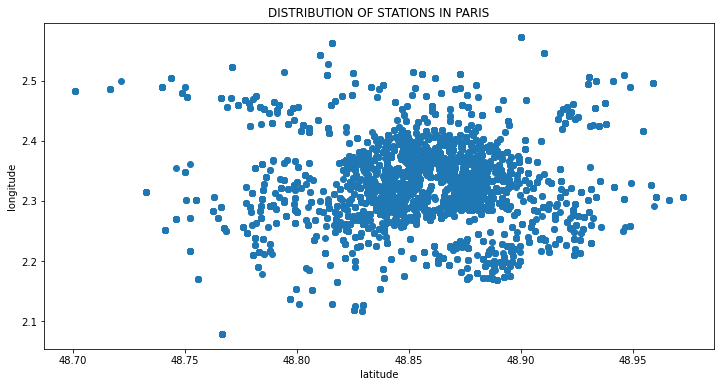

In [14]:
# graphical location of stations
fig, ax = plt.subplots(figsize= (12, 6))
ax.scatter(paris["longitude"], paris["latitude"])
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
ax.set_title("DISTRIBUTION OF STATIONS IN PARIS")